<a href="https://colab.research.google.com/github/Sylvariane/Prediction_crise_cardiaque/blob/master/Pr%C3%A9dictions_crises_cardiaques.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prédictions des crises cardiaques

Les maladies cardiaques sont les premières causes de décès dans le monde. Beaucoup de facteurs vont être à l'origine des maladies cardiaques.

Dans un premier temps, une analyse exploratoire des données va être effectuée. Ensuite, à l'aide de méthode de Machine Learning, un modèle de prédiction va être créer. 

## 0. Préparation de l'environnement de travail

In [1]:
# connexion à Google Drive pour importer le fichier
from google.colab import drive
drive.mount('/content/drive')
dir= '/content/drive/My Drive/Formation Data Analyst/Projets personnels/Heart Failure Predictions/'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
from scipy.stats import ks_2samp 

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import sklearn.metrics as metrics
from mlxtend.plotting import plot_confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
sns.set_palette("Pastel1")
sns.set_style('ticks')

In [4]:
dataset = pd.read_csv('/content/drive/My Drive/Formation Data Analyst/Projets personnels/Heart Failure Predictions/heart_failure_clinical_records_dataset.csv')

## 1. Analyse exploratoire des données 

La première étape consiste à prendre connaissance de la composition de notre jeu de données. 

In [5]:
dataset.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [6]:
print(dataset.shape)
print(dataset.columns)

(299, 13)
Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')


In [7]:
columns = ('age', 'anémie', 'créatine kinase', 'diabète', 'fraction d\'éjection', 'hypertension', 'plaquettes', 'créatine', 'sodium', 'sexe', 'fumeur', 'suivi', 'décès')
dataset.columns = columns
print(dataset.columns)

Index(['age', 'anémie', 'créatine kinase', 'diabète', 'fraction d'éjection',
       'hypertension', 'plaquettes', 'créatine', 'sodium', 'sexe', 'fumeur',
       'suivi', 'décès'],
      dtype='object')


In [8]:
s = (dataset.dtypes == 'object')
object_cols = list(s[s].index)
print('Categorial columns :', object_cols)

Categorial columns : []


Notre jeu de données est composé de 299 lignes et 13 colonnes. Chaque ligne représente un patient et chaque colonne une caractéristique du patient. Parmi ces caractéristiques, on retrouve son âge, le fait de présenter une anémie, le taux de créatine kinase, le fait d'être diabétique, le pourcentage d'éjection du sang lors d'un battement cardiaque, le fait de souffrir d'hypertension artérielle, le nombre de plaquettes, le taux de créatinine, le taux de sodium, le sexe du patient, le fait de fumer ou non, le nombre de jours de surveillance et le décès.

On possède des données catégorielles (diabète, hypertension, etc.) mais les transformations ont déjà été effectuées. La prochaine étape de notre étude va être le nettoyage des données.

### 1.1. Nettoyage des données

On débute le nettoyage des données par la recherche de données manquantes.

In [9]:
dataset.isnull().sum()

age                    0
anémie                 0
créatine kinase        0
diabète                0
fraction d'éjection    0
hypertension           0
plaquettes             0
créatine               0
sodium                 0
sexe                   0
fumeur                 0
suivi                  0
décès                  0
dtype: int64

Notre jeu de données ne présente pas de données manquantes. On va ensuite s'intéresser aux données dupliquées.

In [10]:
dataset.duplicated().sum()

0

Notre jeu de données ne présente pas de données dupliquées. On peut donc passer à l'analyse exploratoire de nos données.

### 1.2. Analyses descriptives de nos données

#### 1.2.1. Description des données quantitatives et adéquation à la loi normale

On va commencer par s'intéresser aux statistiques basiques de notre jeu de données pour le décrire.

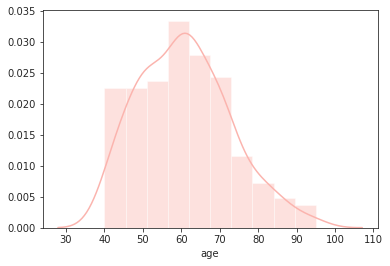

In [11]:
_ = sns.distplot(dataset['age'])
_ = plt.show()

In [12]:
ks_2samp(dataset["age"],list(np.random.normal(np.mean(dataset["age"]), np.std(dataset["age"]), 1000)))

Ks_2sampResult(statistic=0.06980602006688963, pvalue=0.2005813412540537)

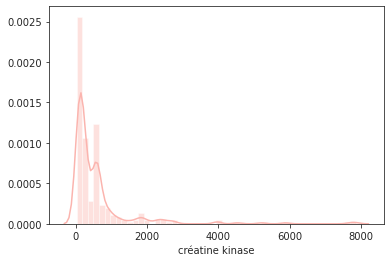

In [13]:
_ = sns.distplot(dataset['créatine kinase'])
_ = plt.show()

In [14]:
ks_2samp(dataset["créatine kinase"],list(np.random.normal(np.mean(dataset["créatine kinase"]), np.std(dataset["créatine kinase"]), 1000)))

Ks_2sampResult(statistic=0.28267558528428094, pvalue=2.1163414271198817e-16)

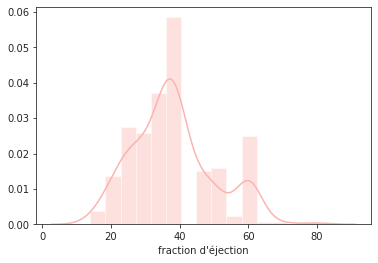

In [15]:
_ = sns.distplot(dataset['fraction d\'éjection'])
_ = plt.show()

In [16]:
ks_2samp(dataset["fraction d\'éjection"],list(np.random.normal(np.mean(dataset["fraction d\'éjection"]), np.std(dataset["fraction d\'éjection"]), 1000)))

Ks_2sampResult(statistic=0.16744147157190636, pvalue=4.113647081083194e-06)

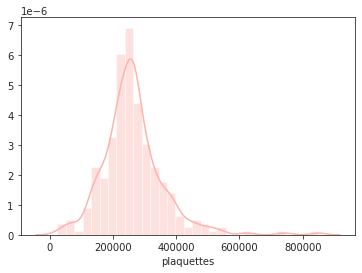

In [17]:
_ = sns.distplot(dataset['plaquettes'])
_ = plt.show()

In [18]:
ks_2samp(dataset["plaquettes"],list(np.random.normal(np.mean(dataset["plaquettes"]), np.std(dataset["plaquettes"]), 1000)))

Ks_2sampResult(statistic=0.09723076923076923, pvalue=0.023758473658437085)

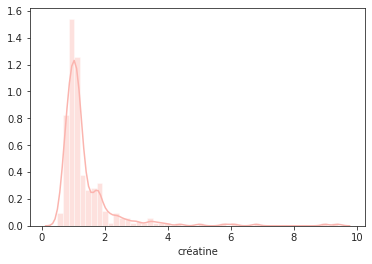

In [19]:
_ = sns.distplot(dataset['créatine'])
_ = plt.show()

In [20]:
ks_2samp(dataset["créatine"],list(np.random.normal(np.mean(dataset["créatine"]), np.std(dataset["créatine"]), 1000)))

Ks_2sampResult(statistic=0.2480969899665552, pvalue=5.986322548778844e-13)

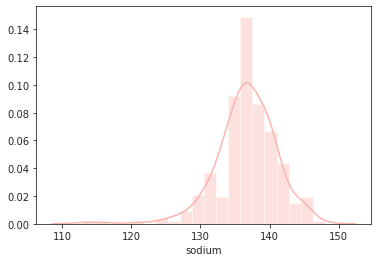

In [21]:
_ = sns.distplot(dataset['sodium'])
_ = plt.show()

In [22]:
ks_2samp(dataset["sodium"],list(np.random.normal(np.mean(dataset["sodium"]), np.std(dataset["sodium"]), 1000)))

Ks_2sampResult(statistic=0.1268963210702341, pvalue=0.0010750851377994142)

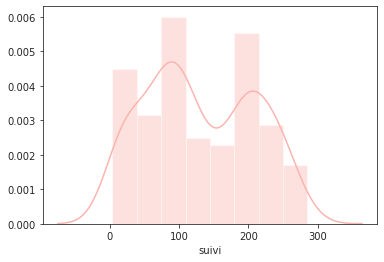

In [23]:
_ = sns.distplot(dataset['suivi'])
_ = plt.show()

In [24]:
ks_2samp(dataset["suivi"],list(np.random.normal(np.mean(dataset["suivi"]), np.std(dataset["suivi"]), 1000)))

Ks_2sampResult(statistic=0.11171571906354515, pvalue=0.005807703423253097)

#### 1.2.2. Description des données catégorielles

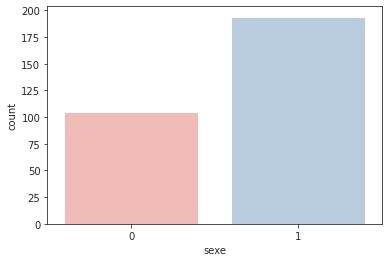

In [25]:
_ = sns.countplot('sexe', data=dataset)
_ = plt.show()

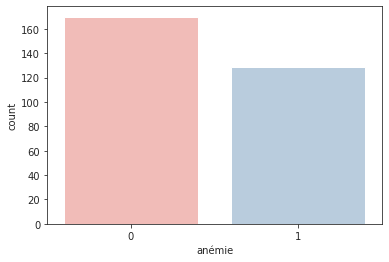

In [26]:
_ = sns.countplot('anémie', data=dataset)
_ = plt.show()

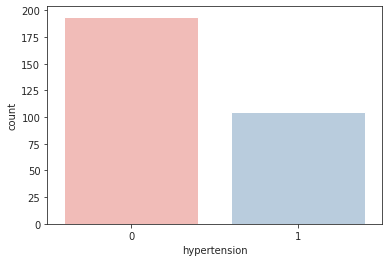

In [27]:
_ = sns.countplot('hypertension', data=dataset)
_ = plt.show()

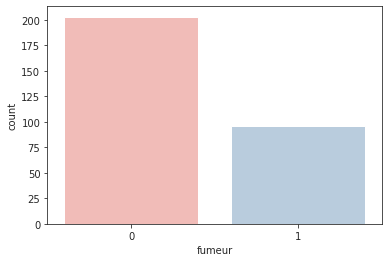

In [28]:
_ = sns.countplot('fumeur', data=dataset)
_ = plt.show()

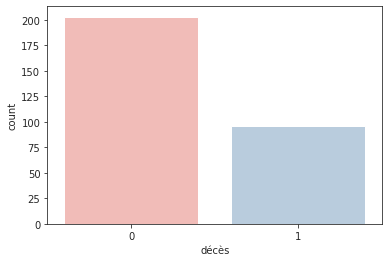

In [29]:
_ = sns.countplot('décès', data=dataset)
_ = plt.show()

### 1.3. Analyses bivariées

#### 1.3.1. Corrélation sur les données catégorielles

In [30]:
X = 'sexe'
Y = 'décès'
cont = dataset[[X, Y]].pivot_table(index=X, columns=Y, aggfunc=len, margins=True, margins_name='Total')

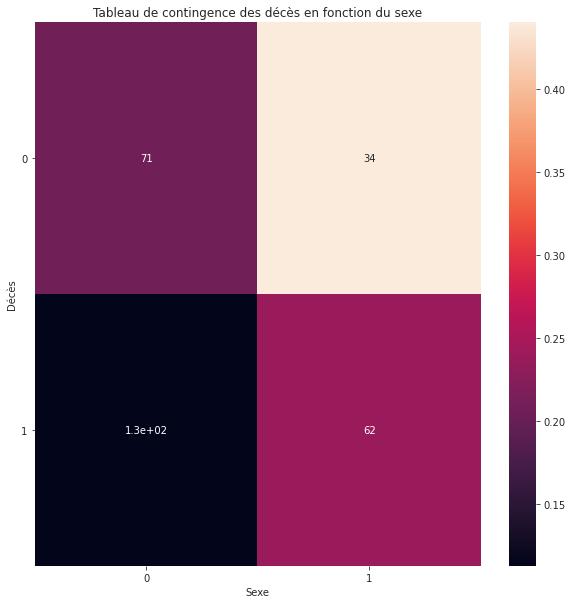

In [31]:
tx = cont.loc[:,["Total"]]
ty = cont.loc[["Total"],:]
n = len(dataset)
indep = tx.dot(ty) / n

c = cont.fillna(0)
measure = (c-indep)**2/indep
xi_n = measure.sum().sum()
table = measure/xi_n

_ = plt.figure(figsize = (10,10))
_ = sns.heatmap(table.iloc[:-1,:-1],annot=c.iloc[:-1,:-1])
_ = plt.xlabel('Sexe')
_ = plt.ylabel('Décès')
_ = plt.yticks(rotation = 360)
_ = plt.title('Tableau de contingence des décès en fonction du sexe')

_ = plt.show()

In [32]:
print('xi_n : ', xi_n)

st_chi2, st_p, st_dof, st_exp = st.chi2_contingency(cont)
print('chi-squared :', st_chi2)
print('p-value :', st_p)

xi_n :  0.005570700255454756
chi-squared : 0.005570700255454755
p-value : 0.9999961281078932


In [33]:
X = 'fumeur'
Y = 'décès'
cont = dataset[[X, Y]].pivot_table(index=X, columns=Y, aggfunc=len, margins=True, margins_name='Total')

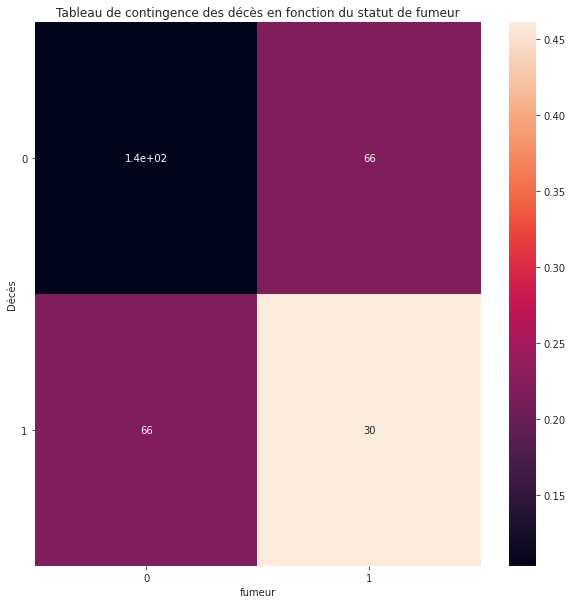

In [34]:
tx = cont.loc[:,["Total"]]
ty = cont.loc[["Total"],:]
n = len(dataset)
indep = tx.dot(ty) / n

c = cont.fillna(0)
measure = (c-indep)**2/indep
xi_n = measure.sum().sum()
table = measure/xi_n

_ = plt.figure(figsize = (10,10))
_ = sns.heatmap(table.iloc[:-1,:-1],annot=c.iloc[:-1,:-1])
_ = plt.xlabel('fumeur')
_ = plt.ylabel('Décès')
_ = plt.yticks(rotation = 360)
_ = plt.title('Tableau de contingence des décès en fonction du statut de fumeur')

_ = plt.show()

In [35]:
print('xi_n : ', xi_n)

st_chi2, st_p, st_dof, st_exp = st.chi2_contingency(cont)
print('chi-squared :', st_chi2)
print('p-value :', st_p)

xi_n :  0.047643851312819833
chi-squared : 0.04764385131281983
p-value : 0.9997207241170311


In [36]:
X = 'anémie'
Y = 'décès'
cont = dataset[[X, Y]].pivot_table(index=X, columns=Y, aggfunc=len, margins=True, margins_name='Total')

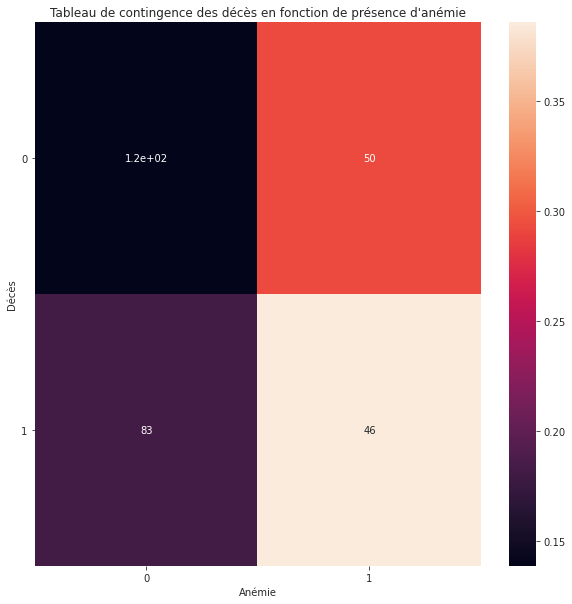

In [37]:
tx = cont.loc[:,["Total"]]
ty = cont.loc[["Total"],:]
n = len(dataset)
indep = tx.dot(ty) / n

c = cont.fillna(0)
measure = (c-indep)**2/indep
xi_n = measure.sum().sum()
table = measure/xi_n

_ = plt.figure(figsize = (10,10))
_ = sns.heatmap(table.iloc[:-1,:-1],annot=c.iloc[:-1,:-1])
_ = plt.xlabel('Anémie')
_ = plt.ylabel('Décès')
_ = plt.yticks(rotation = 360)
_ = plt.title('Tableau de contingence des décès en fonction de présence d\'anémie')

_ = plt.show()

In [38]:
print('xi_n : ', xi_n)

st_chi2, st_p, st_dof, st_exp = st.chi2_contingency(cont)
print('chi-squared :', st_chi2)
print('p-value :', st_p)

xi_n :  1.3131260590309375
chi-squared : 1.3131260590309375
p-value : 0.8591445984730514


In [39]:
X = 'hypertension'
Y = 'décès'
cont = dataset[[X, Y]].pivot_table(index=X, columns=Y, aggfunc=len, margins=True, margins_name='Total')

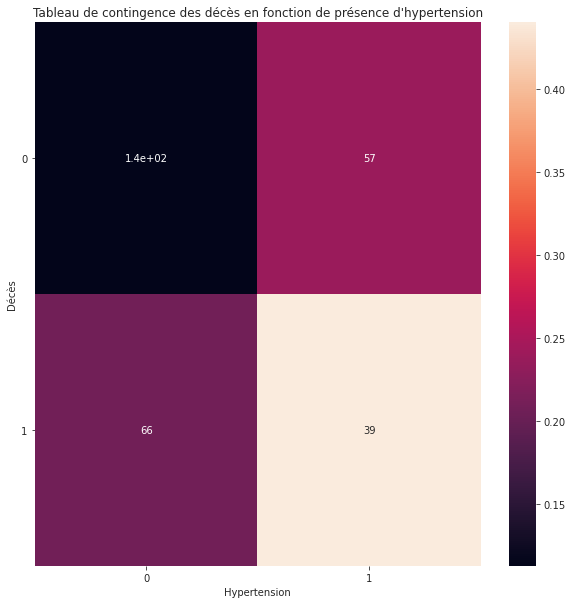

In [40]:
tx = cont.loc[:,["Total"]]
ty = cont.loc[["Total"],:]
n = len(dataset)
indep = tx.dot(ty) / n

c = cont.fillna(0)
measure = (c-indep)**2/indep
xi_n = measure.sum().sum()
table = measure/xi_n

_ = plt.figure(figsize = (10,10))
_ = sns.heatmap(table.iloc[:-1,:-1],annot=c.iloc[:-1,:-1])
_ = plt.xlabel('Hypertension')
_ = plt.ylabel('Décès')
_ = plt.yticks(rotation = 360)
_ = plt.title('Tableau de contingence des décès en fonction de présence d\'hypertension')

_ = plt.show()

In [41]:
print('xi_n : ', xi_n)

st_chi2, st_p, st_dof, st_exp = st.chi2_contingency(cont)
print('chi-squared :', st_chi2)
print('p-value :', st_p)

xi_n :  1.8826805166609848
chi-squared : 1.8826805166609843
p-value : 0.7573258500332782


#### 1.3.2. Corrélation sur les données quantitatives

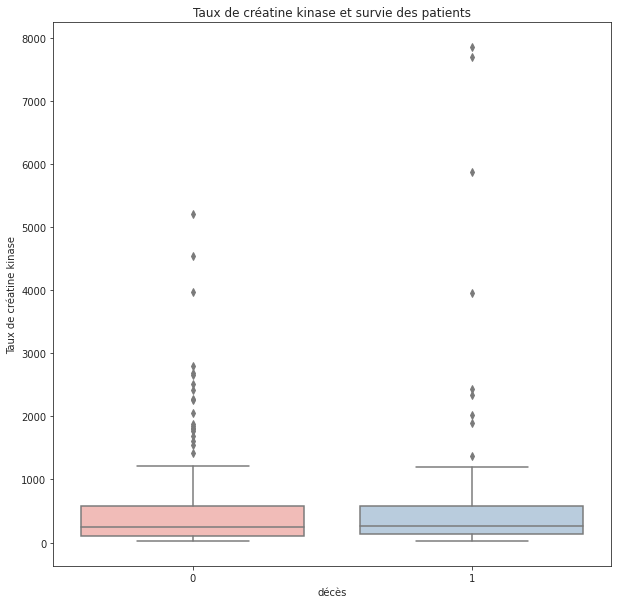

In [42]:
plt.figure(figsize=[10,10])

_ = sns.boxplot(x='décès', y='créatine kinase', data=dataset)
_ = plt.ylabel('Taux de créatine kinase')
_ = plt.title('Taux de créatine kinase et survie des patients')

_ = plt.show()

In [43]:
X = dataset['décès'] # qualitative
Y = dataset['créatine kinase']

def eta_squared(x,y):
    moyenne_y = y.mean()
    classes = []
    for classe in x.unique():
        yi_classe = y[x==classe]
        classes.append({'ni': len(yi_classe),
                        'moyenne_classe': yi_classe.mean()})
    SCT = sum([(yj-moyenne_y)**2 for yj in y])
    SCE = sum([c['ni']*(c['moyenne_classe']-moyenne_y)**2 for c in classes])
    return SCE/SCT
    
print('eta-squared :', eta_squared(X,Y))

eta-squared : 0.003934822088647604


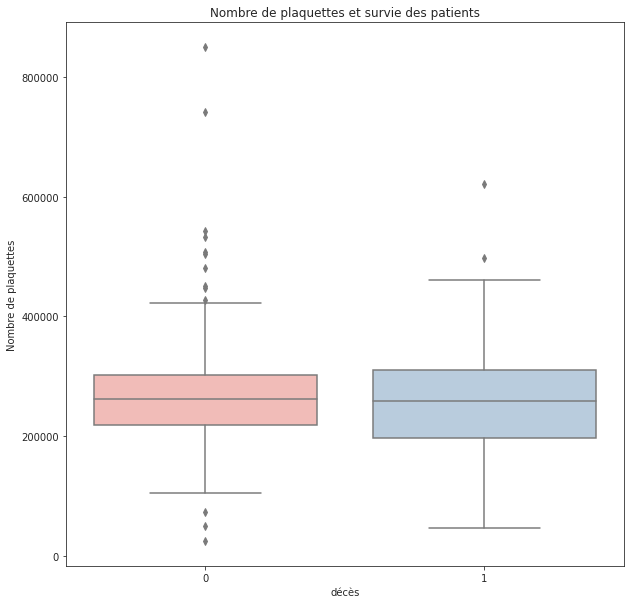

In [44]:
plt.figure(figsize=[10,10])

_ = sns.boxplot(x='décès', y='plaquettes', data=dataset)
_ = plt.ylabel('Nombre de plaquettes')
_ = plt.title('Nombre de plaquettes et survie des patients')

_ = plt.show()

In [45]:
X = dataset['décès'] # qualitative
Y = dataset['plaquettes']

print('eta-squared :', eta_squared(X,Y))

eta-squared : 0.0024146283463926574


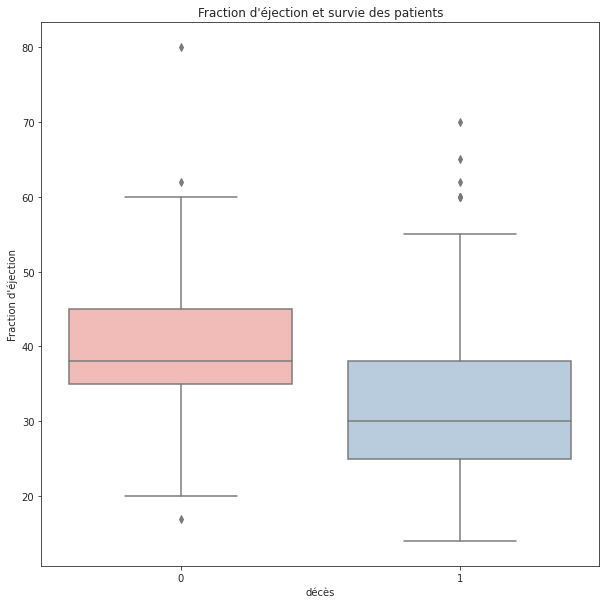

In [46]:
plt.figure(figsize=[10,10])

_ = sns.boxplot(x='décès', y='fraction d\'éjection', data=dataset)
_ = plt.ylabel('Fraction d\'éjection')
_ = plt.title('Fraction d\'éjection et survie des patients')

_ = plt.show()

In [47]:
X = dataset['décès'] # qualitative
Y = dataset['fraction d\'éjection']

print('eta-squared :', eta_squared(X,Y))

eta-squared : 0.07214773942906196


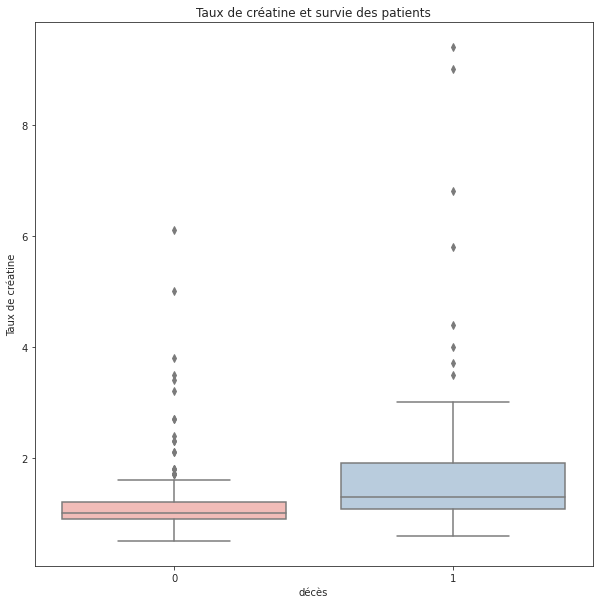

In [48]:
plt.figure(figsize=[10,10])

_ = sns.boxplot(x='décès', y='créatine', data=dataset)
_ = plt.ylabel('Taux de créatine')
_ = plt.title('Taux de créatine et survie des patients')

_ = plt.show()

In [49]:
X = dataset['décès'] # qualitative
Y = dataset['créatine']

print('eta-squared :', eta_squared(X,Y))

eta-squared : 0.0865992828987796


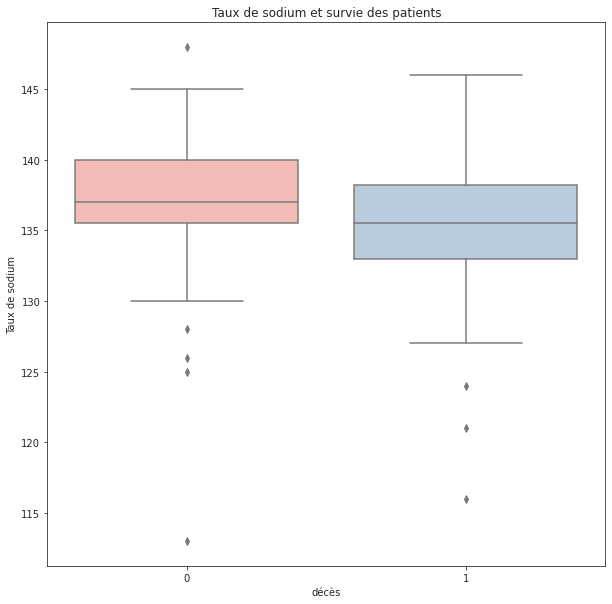

In [50]:
plt.figure(figsize=[10,10])

_ = sns.boxplot(x='décès', y='sodium', data=dataset)
_ = plt.ylabel('Taux de sodium')
_ = plt.title('Taux de sodium et survie des patients')

_ = plt.show()

In [51]:
X = dataset['décès'] # qualitative
Y = dataset['sodium']

print('eta-squared :', eta_squared(X,Y))

eta-squared : 0.03810444405389745


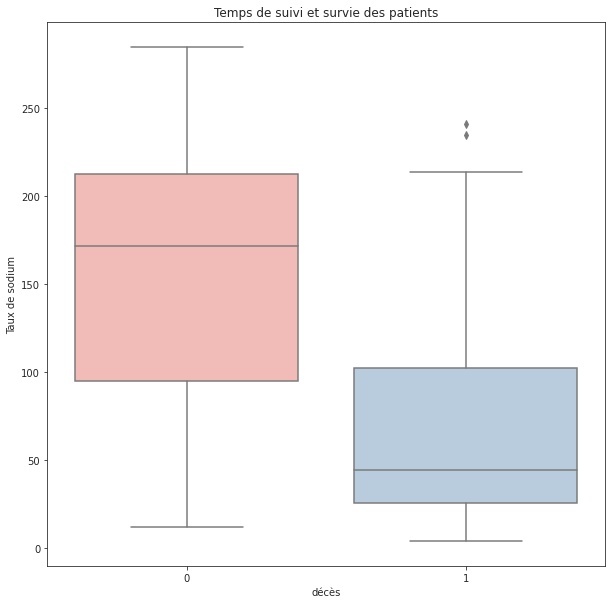

In [52]:
plt.figure(figsize=[10,10])

_ = sns.boxplot(x='décès', y='suivi', data=dataset)
_ = plt.ylabel('Taux de sodium')
_ = plt.title('Temps de suivi et survie des patients')

_ = plt.show()

In [53]:
X = dataset['décès'] # qualitative
Y = dataset['suivi']

print('eta-squared :', eta_squared(X,Y))

eta-squared : 0.2776908246705067


#### 1.3.3. Matrice de corrélation globale

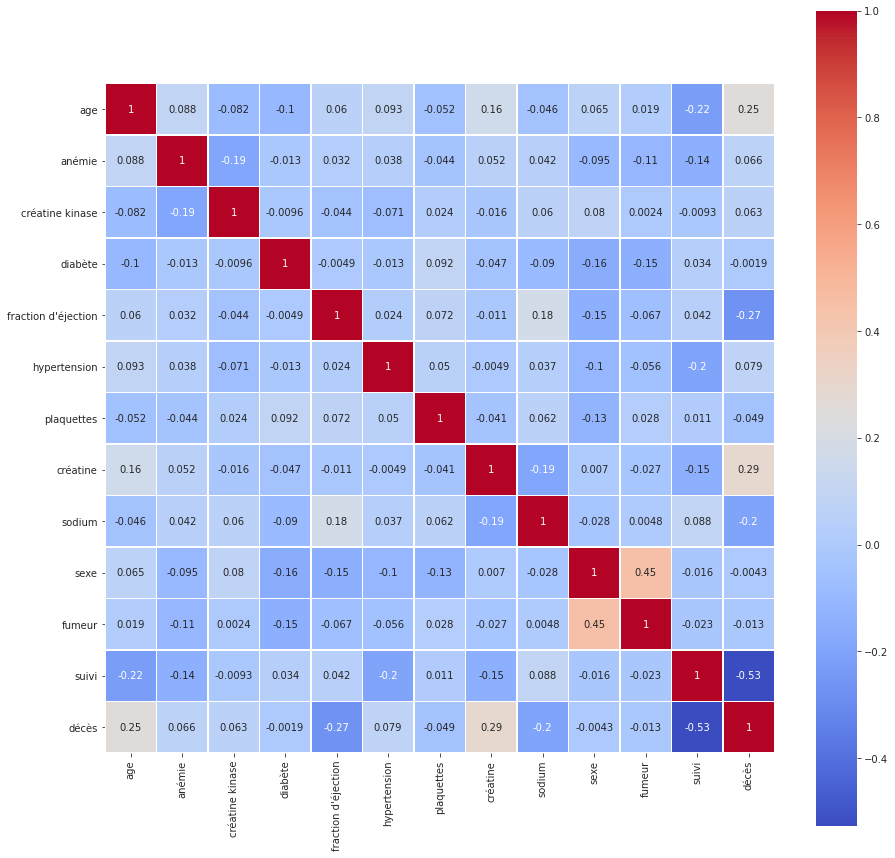

In [54]:
corrMatrix = dataset.corr()
plt.figure(figsize=(15,15))
_ = sns.heatmap(corrMatrix,square = True, cmap="coolwarm",linewidths=.5, annot=True)
_ = plt.show()

## 2. Modélisation et Machine Learning

In [55]:
X = dataset[['age','fraction d\'éjection','créatine', 'sodium', 'suivi']]
y = dataset['décès']

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, train_size = 0.8, random_state=1)

### 2.1. Random Forest

In [57]:
clf = RandomForestClassifier(max_depth=2, random_state=1)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print('Taux de précision : ', metrics.accuracy_score(y_pred=y_pred,y_true=y_test) * 100, '%')

Taux de précision :  90.0 %


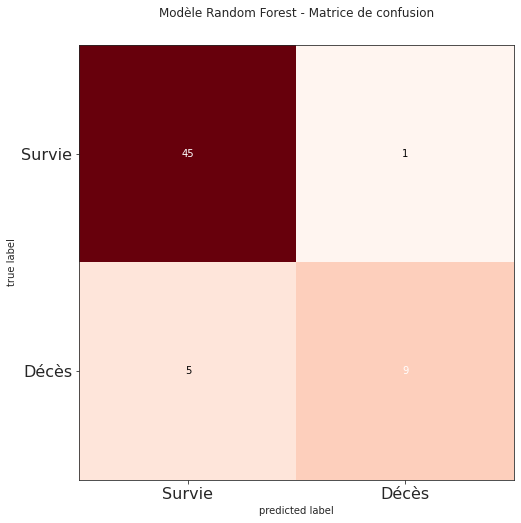

In [58]:
cm = metrics.confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, figsize=(12,8), hide_ticks=True, cmap=plt.cm.Reds)
_ = plt.title("Modèle Random Forest - Matrice de confusion")
_ = plt.xticks(range(2), ["Survie","Décès"], fontsize=16)
_ = plt.yticks(range(2), ["Survie","Décès"], fontsize=16)
_ = plt.show()

### 2.2. Gradient Boosting

In [59]:
gbc = GradientBoostingClassifier(max_depth=2, random_state=1)
gbc.fit(X_train, y_train)
y_pred = gbc.predict(X_test)

print('Taux de précision : ', metrics.accuracy_score(y_pred=y_pred,y_true=y_test) * 100, '%')

Taux de précision :  88.33333333333333 %


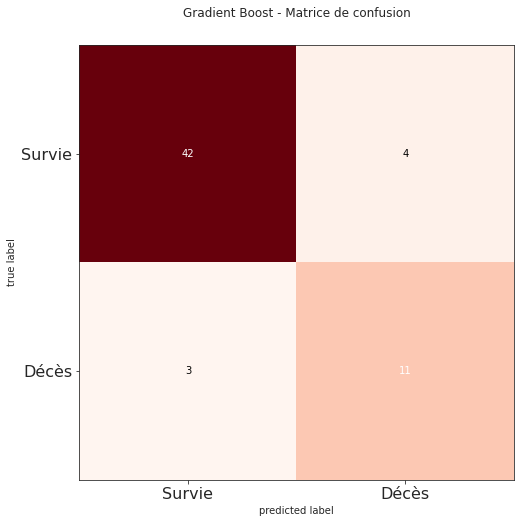

In [60]:
cm = metrics.confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, figsize=(12,8), hide_ticks=True, cmap=plt.cm.Reds)
plt.title("Gradient Boost - Matrice de confusion")
plt.xticks(range(2), ["Survie","Décès"], fontsize=16)
plt.yticks(range(2), ["Survie","Décès"], fontsize=16)
plt.show()

### 2.3. AdaBoost

In [61]:
adc = AdaBoostClassifier(n_estimators=100, random_state=1)
adc.fit(X_train, y_train)
y_pred = adc.predict(X_test)

print('Taux de précision : ', metrics.accuracy_score(y_pred=y_pred,y_true=y_test) * 100, '%')

Taux de précision :  88.33333333333333 %


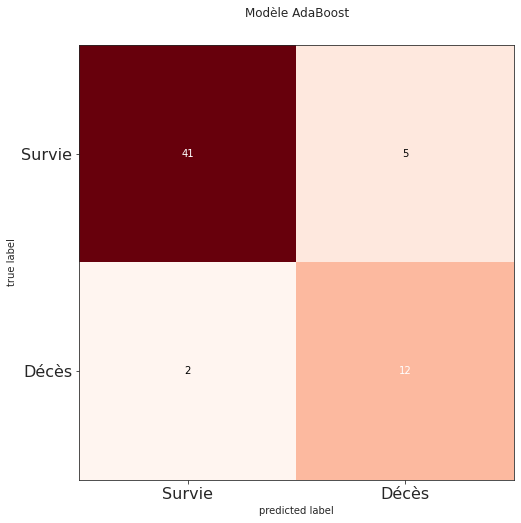

In [62]:
cm = metrics.confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, figsize=(12,8), hide_ticks=True, cmap=plt.cm.Reds)
plt.title("Modèle AdaBoost")
plt.xticks(range(2), ["Survie","Décès"], fontsize=16)
plt.yticks(range(2), ["Survie","Décès"], fontsize=16)
plt.show()

Parmi nos 3 modèles de classification, la méthode de la random forest est celui qui obtient un plus haut pourcentage de précision (90%). Les autres modèles obtiennent de bons pourcentage de précision. Cependant la méthode de la random forest est celle qui produit le moins de faux négatif.

Sources : 
- https://archive.ics.uci.edu/ml/datasets/Heart+failure+clinical+records
- https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0181001
- https://bmcmedinformdecismak.biomedcentral.com/articles/10.1186/s12911-020-1023-5
- https://www.fedecardio.org/Les-gestes-qui-sauvent/L-arret-cardiaque/larret-cardiaque-un-bilan-alarmant
- https://www.who.int/fr/news-room/fact-sheets/detail/the-top-10-causes-of-death
